In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from keras import Sequential

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cat-and-dog/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (340,340)
)

Found 8005 files belonging to 2 classes.


I0000 00:00:1751031322.584876      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [6]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cat-and-dog/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (340,340)
)

Found 2023 files belonging to 2 classes.


In [7]:
def process(image,label):
    image= tf.cast(image/339. , tf.float32)
    return image,label

In [8]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
model = Sequential()

model.add(Conv2D(64,kernel_size = (3,3),activation='relu',padding='valid',input_shape = (340,340,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model.add(Conv2D(256,kernel_size = (3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))


model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 338, 338, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 169, 169, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 167, 167, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 83, 83, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 81, 81, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 40, 40, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 409600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     104,857,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,261,697 (401.54 MB)

 Trainable params: 105,261,697 (401.54 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics = ['accuracy'])

In [12]:
history  = model.fit(train_ds,epochs = 25 , validation_data = validation_ds)

Epoch 1/25


I0000 00:00:1751031333.441188     117 service.cc:148] XLA service 0x7d95700023b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751031333.441917     117 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1751031333.853072     117 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1751031352.753978     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/126 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5177 - loss: 0.9118

E0000 00:00:1751031380.352904     119 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1751031380.586249     119 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.5177 - loss: 0.9105

E0000 00:00:1751031397.065584     118 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1751031397.309117     118 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


126/126 ━━━━━━━━━━━━━━━━━━━━ 68s 364ms/step - accuracy: 0.5178 - loss: 0.9093 - val_accuracy: 0.6006 - val_loss: 0.6902
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 228ms/step - accuracy: 0.5289 - loss: 0.6908 - val_accuracy: 0.5685 - val_loss: 0.6795
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 228ms/step - accuracy: 0.5766 - loss: 0.6743 - val_accuracy: 0.6372 - val_loss: 0.6497
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 229ms/step - accuracy: 0.6128 - loss: 0.6544 - val_accuracy: 0.6317 - val_loss: 0.6475
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 227ms/step - accuracy: 0.6897 - loss: 0.5832 - val_accuracy: 0.6649 - val_loss: 0.6802
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 228ms/step - accuracy: 0.7957 - loss: 0.4259 - val_accuracy: 0.6560 - val_loss: 1.1240
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 227ms/step - accuracy: 0.9093 - loss: 0.2284 - val_accuracy: 0.6476 - val_loss: 1.6268
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 29s 227ms/step - accuracy: 0.9847 - loss: 0.0491 - val

#### Model with dropout and batchnormalization

In [14]:
from keras.layers import BatchNormalization,Dropout

In [34]:
model1 = Sequential()

model1.add(Conv2D(64,kernel_size = (3,3),activation='relu',padding='valid',input_shape = (340,340,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model1.add(Conv2D(128,kernel_size = (3,3),activation='relu',padding='valid'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model1.add(Conv2D(256,kernel_size = (3,3),activation='relu',padding='valid'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))


model1.add(Flatten())

model1.add(Dense(256,activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(128,activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation = 'sigmoid'))

In [35]:
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 338, 338, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 338, 338, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 169, 169, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 167, 167, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 167, 167, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 83, 83, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 81, 81, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 81, 81, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 40, 40, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 409600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │     104,857,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,263,489 (401.55 MB)

 Trainable params: 105,262,593 (401.54 MB)

 Non-trainable params: 896 (3.50 KB)

In [36]:
model1.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics = ['accuracy'])

In [37]:
history1  = model1.fit(train_ds,epochs = 25 , validation_data = validation_ds)

Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 42s 279ms/step - accuracy: 0.5381 - loss: 23.4170 - val_accuracy: 0.5077 - val_loss: 2.4594
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.5404 - loss: 6.3933 - val_accuracy: 0.5393 - val_loss: 0.8561
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.5537 - loss: 1.0169 - val_accuracy: 0.5240 - val_loss: 0.6895
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.5611 - loss: 0.7430 - val_accuracy: 0.6001 - val_loss: 0.6714
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.5855 - loss: 0.6843 - val_accuracy: 0.6065 - val_loss: 0.6549
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.6012 - loss: 0.6736 - val_accuracy: 0.6307 - val_loss: 0.6330
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.6357 - loss: 0.6518 - val_accuracy: 0.6411 - val_loss: 0.6237
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.6342 - loss: 

### model with dropout 0.15 and epoches 25


In [28]:
model2 = Sequential()

model2.add(Conv2D(64,kernel_size = (3,3),activation='relu',padding='valid',input_shape = (340,340,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model2.add(Conv2D(128,kernel_size = (3,3),activation='relu',padding='valid'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))

model2.add(Conv2D(256,kernel_size = (3,3),activation='relu',padding='valid'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'))


model2.add(Flatten())

model2.add(Dense(256,activation = 'relu'))
model2.add(Dropout(0.15))
model2.add(Dense(128,activation = 'relu'))
model2.add(Dropout(0.15))
model2.add(Dense(1,activation = 'sigmoid'))

In [29]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 338, 338, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 338, 338, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 169, 169, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 167, 167, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 167, 167, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 83, 83, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 81, 81, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 81, 81, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 40, 40, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 409600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │     104,857,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,263,489 (401.55 MB)

 Trainable params: 105,262,593 (401.54 MB)

 Non-trainable params: 896 (3.50 KB)

In [30]:
model2.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics = ['accuracy'])

In [31]:
history2  = model2.fit(train_ds,epochs = 25 , validation_data = validation_ds)

Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 282ms/step - accuracy: 0.5511 - loss: 17.4086 - val_accuracy: 0.5230 - val_loss: 0.9655
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.5622 - loss: 2.2805 - val_accuracy: 0.5423 - val_loss: 0.7010
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.5747 - loss: 0.7466 - val_accuracy: 0.5868 - val_loss: 0.6588
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.6160 - loss: 0.6735 - val_accuracy: 0.6411 - val_loss: 0.6379
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.6487 - loss: 0.6435 - val_accuracy: 0.6634 - val_loss: 0.6088
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.6727 - loss: 0.5889 - val_accuracy: 0.6930 - val_loss: 0.5733
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.6941 - loss: 0.5832 - val_accuracy: 0.6723 - val_loss: 0.6461
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 253ms/step - accuracy: 0.6962 - loss: 

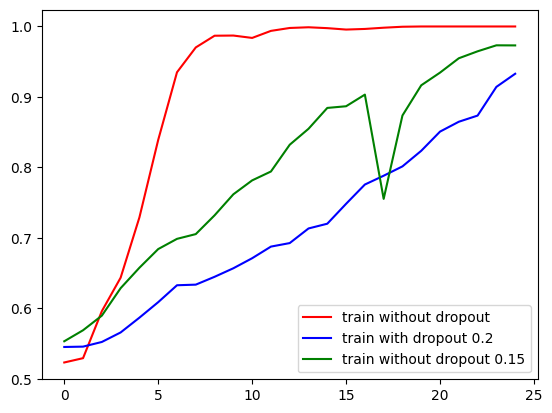

In [38]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'],color= 'red',label= 'train without dropout')
plt.plot(history1.history['accuracy'],color= 'blue',label= 'train with dropout 0.2')
plt.plot(history2.history['accuracy'],color= 'green',label= 'train without dropout 0.15')
plt.legend()
plt.show()

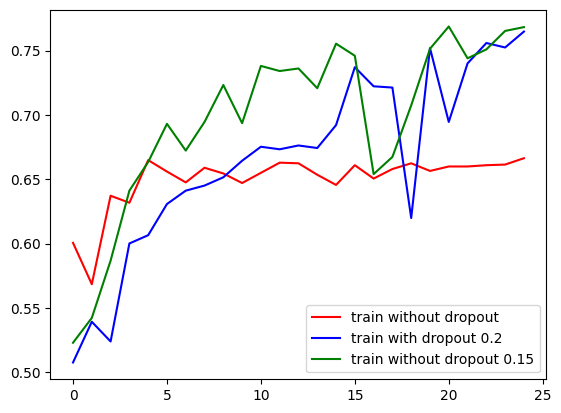

In [39]:
plt.plot(history.history['val_accuracy'],color= 'red',label= 'train without dropout')
plt.plot(history1.history['val_accuracy'],color= 'blue',label= 'train with dropout 0.2')
plt.plot(history2.history['val_accuracy'],color= 'green',label= 'train without dropout 0.15')
plt.legend()
plt.show()